# Modular Subtraction

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `ModNeg`
Performs modular negation.

Applies the operation $\ket{x} \rightarrow \ket{-x \% p}$

Note: This implements the decomposition from Fig 6 in but doesn't match table 8
since we don't use measurement based uncompution because that introduces random phase flips.

#### Parameters
 - `dtype`: Datatype of the register.
 - `p`: The modulus for the negation. 

#### Registers
 - `x`: The register contraining the integer we negate. 

#### References
 - [How to compute a 256-bit elliptic curve private key with only 50 million Toffoli gates](https://arxiv.org/abs/2306.08585). Fig 6b


In [2]:
from qualtran.bloqs.mod_arithmetic import ModNeg

### Example Instances

In [3]:
n = 32
prime = sympy.Symbol('p')
mod_neg = ModNeg(QUInt(n), mod=prime)

#### Graphical Signature

In [4]:
from qualtran.drawing import show_bloqs
show_bloqs([mod_neg],
           ['`mod_neg`'])

### Call Graph

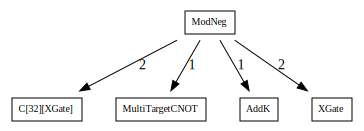

#### Counts totals:
 - `AddK`: 1
 - `C[32][XGate]`: 2
 - `MultiTargetCNOT`: 1
 - `XGate`: 2

In [5]:
from qualtran.resource_counting.generalizers import ignore_split_join
mod_neg_g, mod_neg_sigma = mod_neg.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(mod_neg_g)
show_counts_sigma(mod_neg_sigma)

## `CModNeg`
Performs controlled modular negation.

Applies the operation $\ket{c}\ket{x} \rightarrow \ket{c}\ket{(-1)^c x\%p}$

Note: while this matches the count from Fig 8, it's a different decomposition that controls
only the Add operation instead of turning the CNOTs into toffolis.

#### Parameters
 - `dtype`: Datatype of the register.
 - `p`: The modulus for the negation.
 - `cv`: value at which the gate is active. 

#### Registers
 - `ctrl`: Control bit.
 - `x`: The register contraining the integer we negate. 

#### References
 - [How to compute a 256-bit elliptic curve private key with only 50 million Toffoli gates](https://arxiv.org/abs/2306.08585). Fig 6b and 8


In [6]:
from qualtran.bloqs.mod_arithmetic import CModNeg

### Example Instances

In [7]:
n = 32
prime = sympy.Symbol('p')
cmod_neg = CModNeg(QUInt(n), mod=prime)

#### Graphical Signature

In [8]:
from qualtran.drawing import show_bloqs
show_bloqs([cmod_neg],
           ['`cmod_neg`'])

### Call Graph

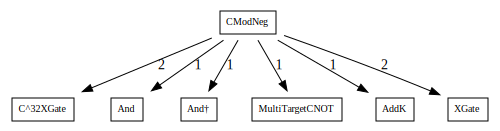

#### Counts totals:
 - `AddK`: 1
 - `And`: 1
 - `And†`: 1
 - `C^32XGate`: 2
 - `MultiTargetCNOT`: 1
 - `XGate`: 2

In [9]:
from qualtran.resource_counting.generalizers import ignore_split_join
cmod_neg_g, cmod_neg_sigma = cmod_neg.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(cmod_neg_g)
show_counts_sigma(cmod_neg_sigma)

## `ModSub`
Performs modular subtraction.

Applies the operation $\ket{x} \ket{y} \rightarrow \ket{x} \ket{y-x \% p}$

#### Parameters
 - `dtype`: Datatype of the register.
 - `p`: The modulus for the negation. 

#### Registers
 - `x`: The register contraining the first integer.
 - `y`: The register contraining the second integer. 

#### References
 - [How to compute a 256-bit elliptic curve private key with only 50 million Toffoli gates](https://arxiv.org/abs/2306.08585). Fig 6c and 8


In [10]:
from qualtran.bloqs.mod_arithmetic import ModSub

### Example Instances

In [11]:
n, p = sympy.symbols('n p')
modsub_symb = ModSub(QUInt(n), p)

#### Graphical Signature

In [12]:
from qualtran.drawing import show_bloqs
show_bloqs([modsub_symb],
           ['`modsub_symb`'])

### Call Graph

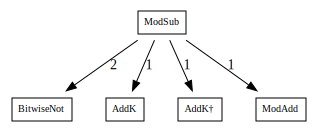

#### Counts totals:
 - `AddK`: 1
 - `AddK†`: 1
 - `BitwiseNot`: 2
 - `ModAdd`: 1

In [13]:
from qualtran.resource_counting.generalizers import ignore_split_join
modsub_symb_g, modsub_symb_sigma = modsub_symb.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(modsub_symb_g)
show_counts_sigma(modsub_symb_sigma)

## `CModSub`
Performs controlled modular subtraction.

Applies the operation $\ket{c}\ket{x} \ket{y} \rightarrow \ket{c}\ket{x} \ket{y-cx \% p}$

#### Parameters
 - `dtype`: Datatype of the register.
 - `p`: The modulus for the negation.
 - `cv`: value at which the bloq is active. 

#### Registers
 - `ctrl`: control register.
 - `x`: The register contraining the first integer.
 - `y`: The register contraining the second integer. 

#### References
 - [How to compute a 256-bit elliptic curve private key with only 50 million Toffoli gates](https://arxiv.org/abs/2306.08585). Fig 6c and 8


In [14]:
from qualtran.bloqs.mod_arithmetic import CModSub

### Example Instances

In [15]:
n, p = sympy.symbols('n p')
cmodsub_symb = CModSub(QUInt(n), p)

#### Graphical Signature

In [16]:
from qualtran.drawing import show_bloqs
show_bloqs([cmodsub_symb],
           ['`cmodsub_symb`'])

### Call Graph

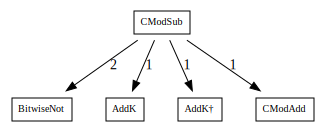

#### Counts totals:
 - `AddK`: 1
 - `AddK†`: 1
 - `BitwiseNot`: 2
 - `CModAdd`: 1

In [17]:
from qualtran.resource_counting.generalizers import ignore_split_join
cmodsub_symb_g, cmodsub_symb_sigma = cmodsub_symb.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(cmodsub_symb_g)
show_counts_sigma(cmodsub_symb_sigma)